<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/PCVK_Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 9 - MORFOLOGI**

TASYA SEVIA ADHA / TI3D / 17 / 2041720031

In [1]:
# import folder yang ada di drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import cv2

1.) Program implementasi operasi dilasi Structuring Element Dilasi (SED) 
berbentuk cross 3x3 tanpa dan dengan menggunakan library morphology dari openCV

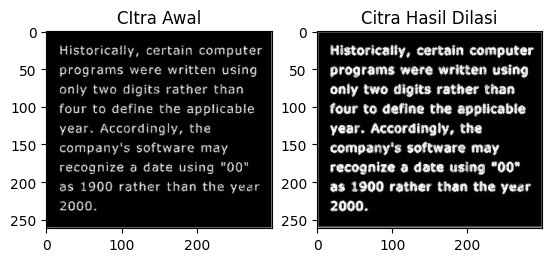

In [26]:
# Without Using the morphologyEx library from OpenCV

# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/morphology.png', 0)

# Define the kernel for dilation
kernel = np.zeros((3,3), dtype=np.uint8)
kernel[1,:] = 1
kernel[:,1] = 1

# Perform the dilation operation on the image using the defined kernel
dilation = cv2.dilate(img, kernel)

# Display the original image and the dilated image side by side
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('CItra Awal')
plt.subplot(122),plt.imshow(dilation, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.show()

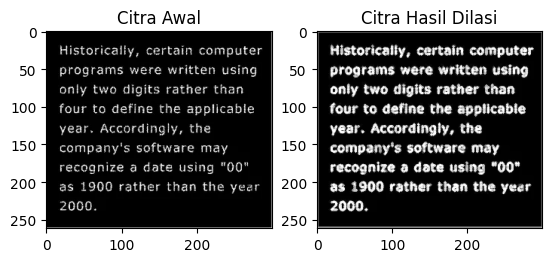

In [25]:
# Using the morphologyEx library from OpenCV

# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/morphology.png', 0)

# Define the kernel for dilation
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# Perform the dilation operation on the image using the defined kernel
dilation = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)

# Display the original image and the dilated image side by side
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.show()

2.) Program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk 
square 5x5 dengan dan tanpa menggunakan library morphology dari openCV

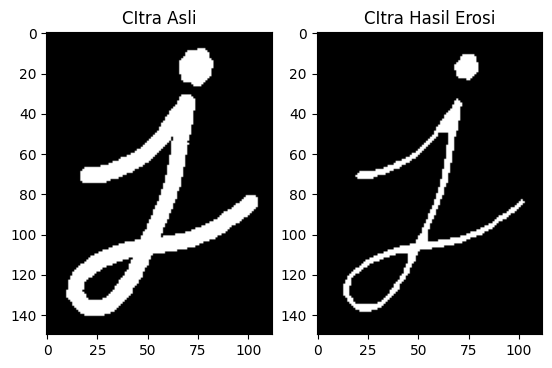

In [30]:
# Without using the morphologyEx library from OpenCV

# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png', 0)

# Define the kernel for erosion
kernel = np.ones((5,5), dtype=np.uint8)

# Define the size of the padding around the image
pad_size = 2

# Pad the input image with zeros around the edges
padded_img = np.pad(img, pad_size, mode='constant')

# Create an output image with the same size and data type as the input image
output = np.zeros_like(img)

# Loop over all pixels in the input image
for i in range(pad_size, img.shape[0]+pad_size):
    for j in range(pad_size, img.shape[1]+pad_size):
        # Compute the minimum value of the pixels in the neighborhood defined by the kernel
        min_val = np.min(padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1] * kernel)
        # Set the output pixel value to the minimum value found in the neighborhood
        output[i-pad_size, j-pad_size] = min_val

# Display the original image and the eroded image side by side
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('CItra Asli')
plt.subplot(122),plt.imshow(output, cmap='gray'),plt.title('CItra Hasil Erosi')
plt.show()

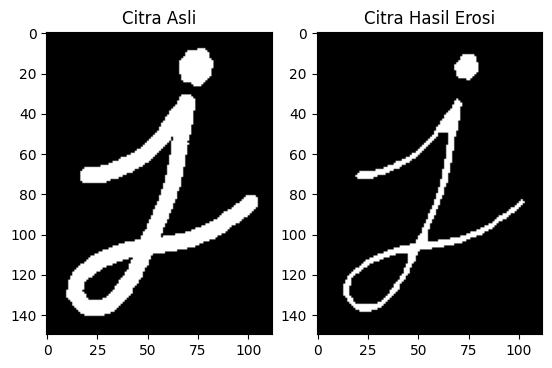

In [31]:
# Using the morphologyEx library from OpenCV

# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png', 0)

# Define the structuring element as a 5x5 square
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# Perform the erosion operation using the structuring element
erosion = cv2.erode(img, se)

# Display the input and output images
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Asli')
plt.subplot(122),plt.imshow(erosion, cmap='gray'),plt.title('Citra Hasil Erosi')
plt.show()

3.) Program implementasi operasi opening dengan Structuring Element (Erosi) berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

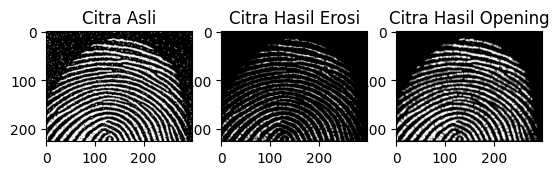

In [62]:
# Without using the morphologyEx library from OpenCV

# Define a 3x3 square structuring element
se = np.ones((3, 3), dtype=np.uint8)

# Read the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png', 0)

# Perform erosion operation
erosion = np.zeros_like(img)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        temp = img[i-1:i+2, j-1:j+2] * se
        erosion[i, j] = np.min(temp)

# Perform opening operation
opening = np.zeros_like(img)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        temp = erosion[i-1:i+2, j-1:j+2] * se
        opening[i, j] = np.max(temp)

# Display the results
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Opening')
plt.show()

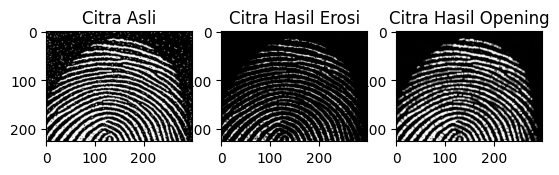

In [61]:
# Using the morphologyEx library from OpenCV

# Load the image and convert it to grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png', 0)

# Define a 3x3 kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Perform the erosion operation
erosion = cv2.erode(img, kernel, iterations = 1)

# Perform the opening operation
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Display the results
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Opening')
plt.show()

4.) Program implementasi operasi closing dengan Structuring Element (Dilasi) berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

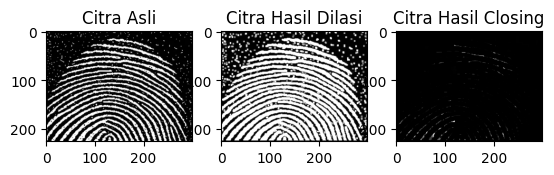

In [78]:
# Without using the morphologyEx library from OpenCV

# Define a 3x3 square structuring element
se = np.ones((3, 3), dtype=np.uint8)

# Read the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png', 0)

# Define the closing operation as dilation followed by erosion
dilated = np.zeros_like(img)
eroded = np.zeros_like(img)

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        patch = img[i-1:i+2, j-1:j+2]
        dilated[i,j] = np.max(patch)
        eroded[i,j] = np.min(patch)

closed = np.zeros_like(img)
opened = np.zeros_like(img)

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        patch = eroded[i-1:i+2, j-1:j+2]
        closed[i,j] = np.min(patch)

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        patch = dilated[i-1:i+2, j-1:j+2]
        opened[i,j] = np.max(patch)

# Display the results
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(132), plt.imshow(dilated, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closed, cmap='gray'), plt.title('Citra Hasil Closing')
plt.show()

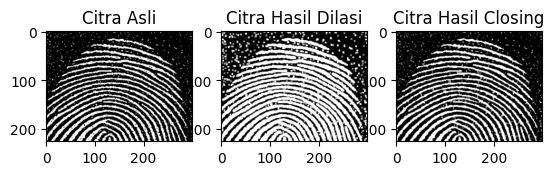

In [71]:
# Using the morphologyEx library from OpenCV

# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png', 0)

# Define the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# Perform the closing operation
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Perform the dilation operation
dilation = cv2.dilate(img, kernel, iterations=1)

# Display the results
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(132), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closing, cmap='gray'), plt.title('Citra Hasil Closing')
plt.show()

5.) Program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

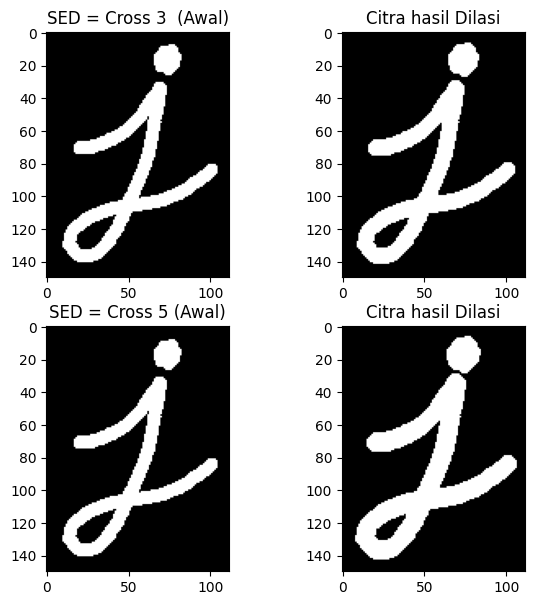

In [90]:
# SED cross 3x3 & 5x5
img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dilation3 = cv2.dilate(img, kernel3, iterations=1)

dilation5 = cv2.dilate(img, kernel5, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('SED = Cross 3  (Awal)')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Citra hasil Dilasi')
axs[1, 0].imshow(img, cmap='gray')
axs[1, 0].set_title('SED = Cross 5 (Awal)')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Citra hasil Dilasi')
plt.show()

6.) Program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

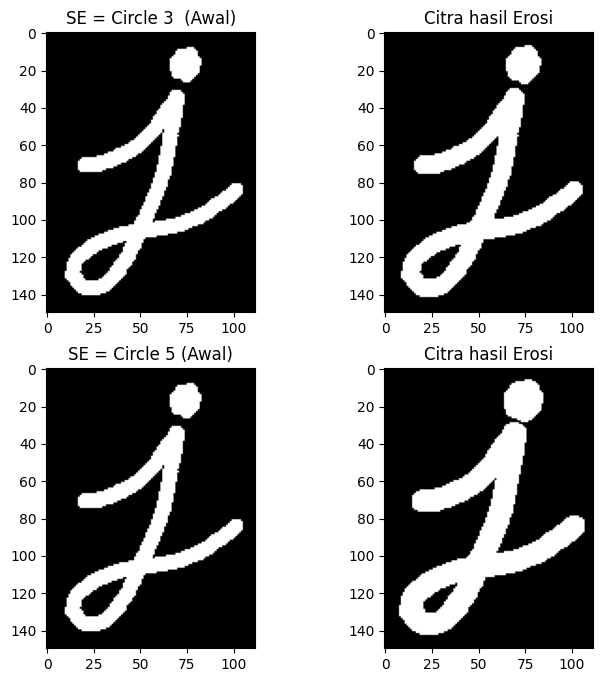

In [93]:
#SE circular 3x3 5x5
img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

kern6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kern7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

dilation6 = cv2.dilate(img, kern6, iterations=1)

dilation7 = cv2.dilate(img, kern7, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('SE = Circle 3  (Awal)')
axs[0, 1].imshow(dilation6, cmap='gray')
axs[0, 1].set_title('Citra hasil Erosi')
axs[1, 0].imshow(img, cmap='gray')
axs[1, 0].set_title('SE = Circle 5 (Awal)')
axs[1, 1].imshow(dilation7, cmap='gray')
axs[1, 1].set_title('Citra hasil Erosi')
plt.show()

7.) Program implementasi operasi erosi dengan Structuring Element berbentuk 
Rectangle 3 x 5 dan 5 x 7

Text(0.5, 1.0, 'Citra hasil Erosi')

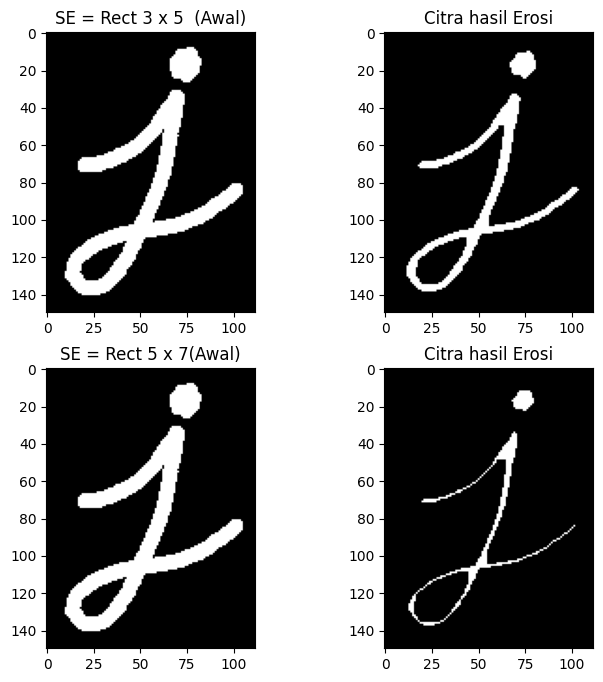

In [95]:
#Rectangel 3 x 5 dan 5 x 7
img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

kern8 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,5))
kern9 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,7))

erode8 = cv2.erode(img, kern8, iterations=1)

erode9 = cv2.erode(img, kern9, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('SE = Rect 3 x 5  (Awal)')
axs[0, 1].imshow(erode8, cmap='gray')
axs[0, 1].set_title('Citra hasil Erosi')
axs[1, 0].imshow(img, cmap='gray')
axs[1, 0].set_title('SE = Rect 5 x 7(Awal)')
axs[1, 1].imshow(erode9, cmap='gray')
axs[1, 1].set_title('Citra hasil Erosi')

8.) Program implementasi operasi erosi dengan Structuring Element berbentuk 
Line Vertikal 3 dan 5

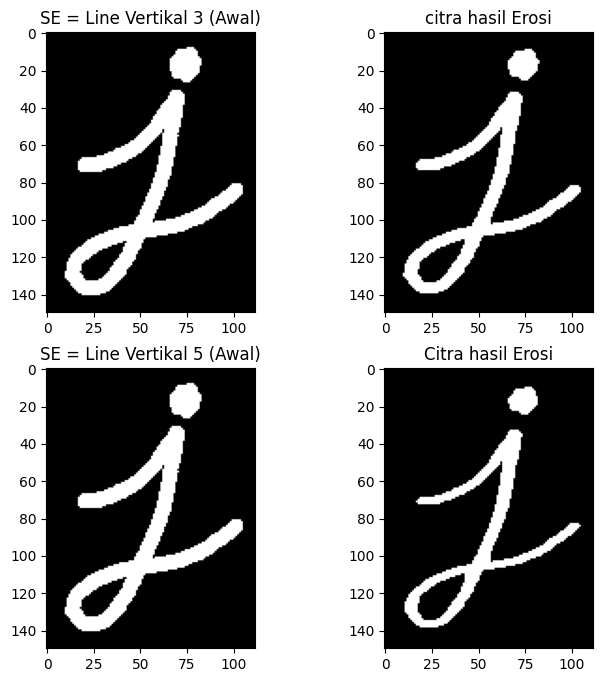

In [97]:
#SE Vertikal 3 dan 5
img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

kern1 = np.ones((3,1),np.uint8)
kern2 = np.ones((5,1),np.uint8)  
erosi10 = cv2.morphologyEx(img, cv2.MORPH_ERODE, kern1)
erosi11 = cv2.morphologyEx(img, cv2.MORPH_ERODE, kern2)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('SE = Line Vertikal 3 (Awal)')
axs[0, 1].imshow(erosi10, cmap='gray')
axs[0, 1].set_title('citra hasil Erosi')
axs[1, 0].imshow(img, cmap='gray')
axs[1, 0].set_title('SE = Line Vertikal 5 (Awal)')
axs[1, 1].imshow(erosi11, cmap='gray')
axs[1, 1].set_title('Citra hasil Erosi')
plt.show()